# Linear Regression

In [56]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

2.19.0


## Useful info

* **Input Layer:** Equal to no of input parameters
* **Hidden Layer:** Minimum 1, Maximum unlimited
* **Neurons Per Layer:** Specific to a problem, generally from 10 to 100
* **Output Layer Shape:** Depends on the prediction requirements. If Regression then 1, otherwise
* **Hidden Activation Function:** Usually ReLU
* **Output Activation:** None, ReLU, Logistic
* **Loss Function:** MSE (Mean Square Error), MAE (Mean Absolute Error), Huber (Combination of MAE & MSE) if there are outliers
* **Optimizer:** SGD, Adam

In [ ]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)
plt.show()

## Steps in Modelling with TensorFlow

* **Creating a Model:** Piece together the layers of a Neural Network yourself or import previously built model (Transfer Learning)
* **Compiling:** Defining how a model performance should be measured (Loss/Metrics) as well as defining how it should improve (Optimizer)
* **Fitting a Model:** Letting the Model try to find patterns in the data.

## **HyperParameter**
In machine learning is something a data analyst or developer can set themselves.
## Parameter:
In machine Learning a parameter usually describes something that a model learns on its own.

In [ ]:
tf.random.set_seed(42)

# Creating a Model Using Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the Model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


In [ ]:
model.summary()

In [ ]:
model.predict(np.array([17.0]))

## **Improving a Model**

To improve our model, we can do some changes which are almost universal

**Changes in Model:**
* We can add more layers
* We can increase the number of hidden units
* We can change the Activation function

**Compiling a Model:**
* We can choose a different optimization functions
* We can change the Learning Rate of the optimization Function

**Fitting a Model:**
* We can fit a model with more EPOCHS.
* We can also provide more data

So, in summary below are some of the techniques we can use to improve the model performances.

* Increase the Number Of Layers
* Increasing the number of hidden units
* Changing the Learning Rate





In [ ]:
tf.random.set_seed(42)

# Creating a Model Using Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae", "accuracy"])

# Fit the Model
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [ ]:
# plot the accuracy
df = pd.DataFrame(history.history)
plt.plot(df["loss"])
plt.show()

In [ ]:
model.predict(np.array([2.0]))

## Let's Enter a bigger Dataset

In [ ]:
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)

plt.scatter(X,y)
plt.show()

In [26]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()
plt.show()

In [ ]:
tf.random.set_seed(42)

# Here the output layer is inferred by tensorflow automatically
model =tf.keras.Sequential([
                            tf.keras.layers.Dense(1, input_shape=[1])])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()


In [55]:
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
df = pd.DataFrame(history.history)


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## Model Summary

**Total Params:**
Total Number of parameters in the model

**Trainable Parameters:**
Parameters which the model updates when it trains

**Non-Trainable Parameters:**
These parameters are not updated during training. This is normally the case when you bring in already learned patterns from other models during transfer learning.


##Visualizing the Predictions

In [40]:
y_predict = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [42]:
np.round(y_predict,2)

array([[49.72],
       [52.93],
       [56.15],
       [59.37],
       [62.59],
       [65.81],
       [69.03],
       [72.25],
       [75.47],
       [78.69]], dtype=float32)

In [46]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_predict):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()
  plt.show()




In [ ]:
plot_predictions(X_train,y_train ,X_test,y_test,y_predict)

## Evaluating Predictions

Two of the most important evaluation metrics used for Regression Problem are

**Mean Absolute Error (MAE):**
The mean difference between each of the predictions
**Mean Squared Error (MSE)**
The squared mean difference between the predictions.


In [ ]:
model.evaluate(X_test, y_test)

**Model.evaluate(X_test, y_test):**
It returns the loss of the model as well as any other metric specified during the compilation step.

## Building more models for evaluation

In [ ]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([

                              tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
history1=model1.fit(tf.expand_dims(X_train, axis=-1),
                                     y_train, epochs=100
                                     )


In [ ]:
df = pd.DataFrame(history1.history)
# plot the loss
plt.plot(df["mae"])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


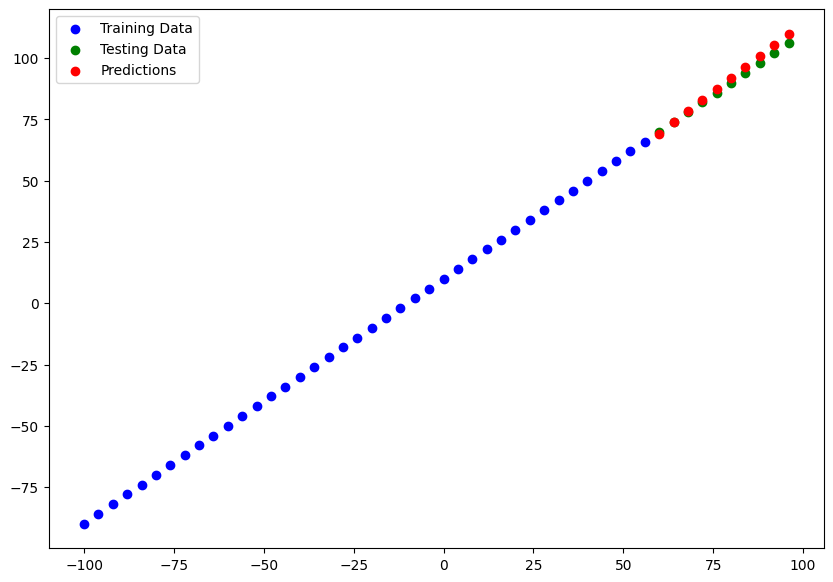

In [62]:
y_preds_1 = model1.predict(X_test)
plot_predictions(X_train,y_train ,X_test,y_test,y_preds_1)